# Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing libraries
from sklearn.model_selection import train_test_split

#Modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#Evaluation libraries
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix


import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)

# Importing Full Training and Testing Dataset

**I will be converting this from a 6 class multi-classification problem into a binary classification problem.**

In [2]:
#Importing train data
s = os.path.sep
train_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'train_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)
      
#Converting month ahead score to binary. 
train_df['month_ahead_binary'] = pd.cut(train_df['month_ahead_score'], 
                                     bins = [0, 2, 5], 
                                     labels = [0, 1], 
                                     include_lowest = True)

#Reordering columns
train_df = train_df[['fips', 'month_ahead_score', 'month_ahead_binary','rounded_score', 'month_ago_score',
       'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum',
       'surface_pressure_30d_avg', 'specific_humidity_30d_avg',
       'temp_2m_max_7d_avg', 'temp_2m_max_30d_avg', 'lat']]    
    
    
#Importing test data                         
test_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                      'drought_prediction_data' + s + 'test_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)


#Converting month ahead score to binary. 
test_df['month_ahead_binary'] = pd.cut(test_df['month_ahead_score'], 
                                     bins = [0, 2, 5], 
                                     labels = [0, 1], 
                                     include_lowest = True)

#Reordering columns
test_df = test_df[['fips', 'month_ahead_score', 'month_ahead_binary','rounded_score', 'month_ago_score',
       'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum',
       'surface_pressure_30d_avg', 'specific_humidity_30d_avg',
       'temp_2m_max_7d_avg', 'temp_2m_max_30d_avg', 'lat']]


In [36]:
train_df.head()

fips  month_ahead_score month_ahead_binary  rounded_score  month_ago_score  \
0  1001                2.0                  0            1.0              1.0   
1  1001                2.0                  0            2.0              1.0   
2  1001                3.0                  1            2.0              1.0   
3  1001                3.0                  1            2.0              1.0   
4  1001                3.0                  1            2.0              1.0   

   precip_7d_sum  precip_30d_sum  precip_90d_sum  surface_pressure_30d_avg  \
0           2.29           64.38          275.80                    100.18   
1           1.00           27.21          276.80                    100.18   
2           0.41           11.94          265.19                    100.09   
3          19.35           26.92          278.18                    100.13   
4          15.97           37.05          267.18                    100.10   

   specific_humidity_30d_avg  temp_2m_max_7d_avg  temp_2m_max_30d_avg  \
0                       8.43               24.97                22.56   
1                       9.29               30.58                25.11   
2                       9.57               31.34                27.34   
3                      10.44               32.20                29.34   
4                      11.68               33.06                31.52   

         lat  
0  32.536382  
1  32.536382  
2  32.536382  
3  32.536382  
4  32.536382

In [35]:
test_df.head()

fips  month_ahead_score month_ahead_binary  rounded_score  month_ago_score  \
0  1001                0.0                  0            0.0              1.0   
1  1001                0.0                  0            0.0              1.0   
2  1001                0.0                  0            0.0              1.0   
3  1001                0.0                  0            0.0              0.0   
4  1001                0.0                  0            0.0              0.0   

   precip_7d_sum  precip_30d_sum  precip_90d_sum  surface_pressure_30d_avg  \
0          20.13          142.15          349.14                    100.08   
1          23.52          142.34          369.29                     99.98   
2          58.63          159.67          401.54                    100.05   
3           2.14          104.42          345.09                    100.06   
4           0.00           84.29          312.08                    100.11   

   specific_humidity_30d_avg  temp_2m_max_7d_avg  temp_2m_max_30d_avg  \
0                      10.19               25.40                23.92   
1                      11.09               28.09                25.43   
2                      11.30               26.00                25.53   
3                      12.54               29.53                27.23   
4                      13.58               33.02                29.10   

         lat  
0  32.536382  
1  32.536382  
2  32.536382  
3  32.536382  
4  32.536382

# Importing West Coast Training and Testing Dataset

**I will be converting this from a 6 class multi-classification problem into a binary classification problem.**

In [3]:
s = os.path.sep
wc_train_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'wc_train_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)

#Converting month ahead score to binary. 
wc_train_df['month_ahead_binary'] = pd.cut(wc_train_df['month_ahead_score'], 
                                     bins = [0, 2, 5], 
                                     labels = [0, 1], 
                                     include_lowest = True)

#Reordering columns
wc_train_df = wc_train_df[['fips', 'month_ahead_score', 'month_ahead_binary','rounded_score', 'month_ago_score',
       'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum',
       'surface_pressure_30d_avg', 'specific_humidity_30d_avg',
       'temp_2m_max_7d_avg', 'temp_2m_max_30d_avg', 'lat']]
        
                
wc_test_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                      'drought_prediction_data' + s + 'wc_test_df_final.csv').drop(labels = 'Unnamed: 0', axis = 1)

#Converting month ahead score to binary. 
wc_test_df['month_ahead_binary'] = pd.cut(wc_test_df['month_ahead_score'], 
                                     bins = [0, 2, 5], 
                                     labels = [0, 1], 
                                     include_lowest = True)

#Reordering columns
wc_test_df = wc_test_df[['fips', 'month_ahead_score', 'month_ahead_binary','rounded_score', 'month_ago_score',
       'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum',
       'surface_pressure_30d_avg', 'specific_humidity_30d_avg',
       'temp_2m_max_7d_avg', 'temp_2m_max_30d_avg', 'lat']]




In [37]:
wc_train_df.head()

fips  month_ahead_score month_ahead_binary  rounded_score  month_ago_score  \
0  6001                0.0                  0            0.0              0.0   
1  6001                0.0                  0            0.0              0.0   
2  6001                0.0                  0            0.0              0.0   
3  6001                0.0                  0            0.0              0.0   
4  6001                0.0                  0            0.0              0.0   

   precip_7d_sum  precip_30d_sum  precip_90d_sum  surface_pressure_30d_avg  \
0           0.04           31.75          255.04                     99.72   
1          14.00           45.75          256.07                     99.64   
2          11.40           36.42          169.68                     99.68   
3           0.05           25.49          124.05                     99.63   
4           0.01           25.47           94.32                     99.49   

   specific_humidity_30d_avg  temp_2m_max_7d_avg  temp_2m_max_30d_avg  \
0                       7.05               22.30                20.51   
1                       7.15               20.51                20.53   
2                       6.87               18.58                20.21   
3                       7.42               31.11                23.07   
4                       7.66               26.48                24.13   

         lat  
0  37.648081  
1  37.648081  
2  37.648081  
3  37.648081  
4  37.648081

In [38]:
wc_test_df.head()

fips  month_ahead_score month_ahead_binary  rounded_score  month_ago_score  \
0  6001                0.0                  0            0.0              0.0   
1  6001                0.0                  0            0.0              0.0   
2  6001                0.0                  0            0.0              0.0   
3  6001                0.0                  0            0.0              0.0   
4  6001                0.0                  0            0.0              0.0   

   precip_7d_sum  precip_30d_sum  precip_90d_sum  surface_pressure_30d_avg  \
0           0.02           15.07          380.46                     99.57   
1           0.23            4.76          313.32                     99.51   
2           0.09            4.10          235.02                     99.39   
3          67.42           67.76          257.86                     99.30   
4           3.43           71.17          201.64                     99.27   

   specific_humidity_30d_avg  temp_2m_max_7d_avg  temp_2m_max_30d_avg  \
0                       8.12               23.12                20.42   
1                       7.86               21.16                21.25   
2                       8.01               21.65                21.90   
3                       7.83               16.64                20.97   
4                       7.59               19.94                19.81   

         lat  
0  37.648081  
1  37.648081  
2  37.648081  
3  37.648081  
4  37.648081

___

# Visualizations

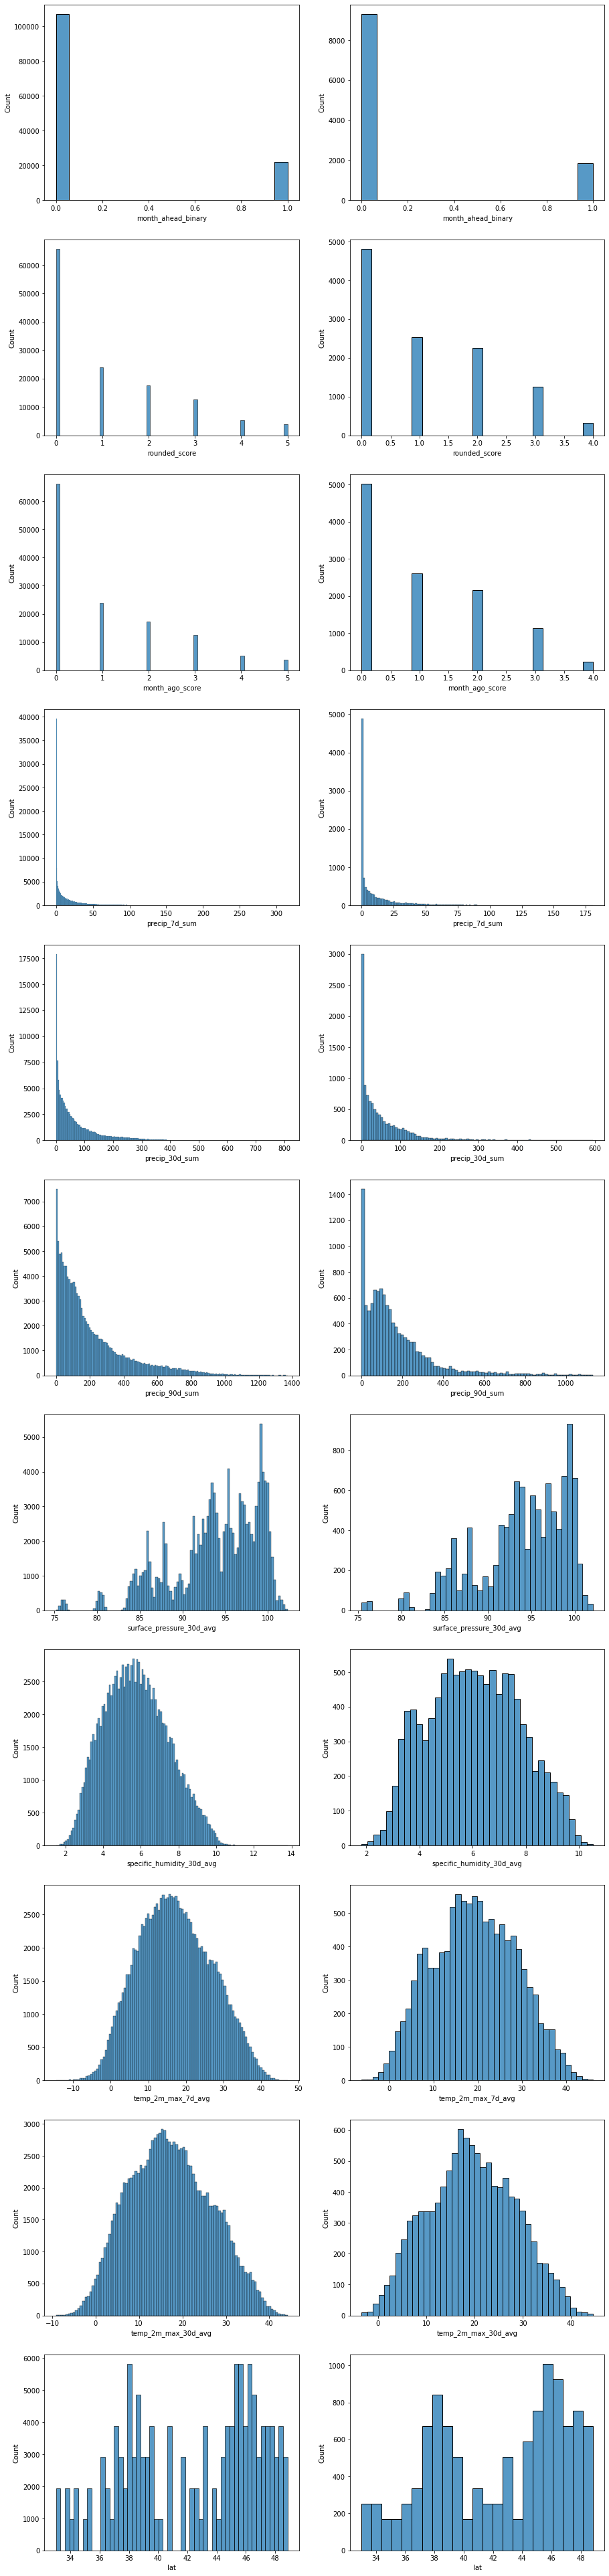

In [4]:
#Creating a list of features from the dataset to iterate through 
features = list(wc_train_df.columns.drop(['month_ahead_score', 'fips']))

#Establishing plots and plot sizes
fig, ax = plt.subplots(ncols = 2, nrows=11, figsize=(15, 70))
i = 0

#Creating loop to generate KDE plot and histogram for each feature
for col in features: 
    sns.histplot(wc_train_df, x=col, kde=False, ax = ax[i,0])
    sns.histplot(wc_test_df, x=col, kde=False, ax = ax[i,1])
    
    i = i + 1


_**From the histograms we can see that the distribtions are mostly similar for the both the training and testing dataset. There is an imbalance for the target feature, 'month_ahead_binary'.**_

____

# Defining Useful Functions

In [27]:
def model_compare(model_list, scoring_mechanism):

    #Empty lists to append for analysis
    mod = []
    f1_score = []
    precision_score = []
    accuracy_score = []


    #Creating a for loop to test all models with generic parameters
    for m in model_list:
        mod.append(m)
        f1_score.append(cross_val_score(m, X_train, y_train, scoring = 'f1', cv = 5, n_jobs = -1).mean())
        precision_score.append(cross_val_score(m, X_train, y_train, scoring = 'precision', cv = 5, n_jobs = -1).mean())
        accuracy_score.append(cross_val_score(m, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1).mean())
    
        
    #Creating the DataFrame for analysis
    model_df = pd.DataFrame(columns = ['model','f1', 'precision', 'accuracy'])
    model_df['model'] = mod
    model_df['f1'] = f1_score
    model_df['precision'] = precision_score
    model_df['accuracy'] = accuracy_score
    return model_df.sort_values(by=[str(scoring_mechanism)], ascending = False).style.background_gradient(subset= str(scoring_mechanism))


def random_forest_classifier(X_train, X_test, y_train, y_test, test_df):
    '''
    Creates a random forest classifier, trains it on the training dataset, and tests the model on the
    testing dataset. Produces classification report, confusion matrix, and ROC curve with AUC score. 
    
    '''
    
    #Instantiateing the RandomForestClassifier
    rfc = RandomForestClassifier()
    
    #Fitting the model to the training data
    rfc.fit(X_train, y_train)
    
    #Testing model on testing dataset
    test_X = test_df.drop(['month_ahead_score', 'month_ahead_binary', 'fips'], axis = 1).copy()
    test_y = test_df['month_ahead_binary'].copy()

    #Using the fitted model to make a prediction with testing data
    test_y_pred = rfc.predict(test_X)
    
    # Compute predicted probabilities with test_X
    test_y_pred_prob = rfc.predict_proba(test_X)[:,1]
    
    #Printing the classification report for model testing
    print('Testing Data Classification Report:\n',
        classification_report(test_y, test_y_pred))

    #Printing the confusion matrix for model testing
    print('Testing Data Confusion Matrix:\n ',
        plot_confusion_matrix(rfc, test_X, test_y))
    
    #Creating ROC Curve for model on testing dataset
    rf_fpr, rf_tpr, threshold = roc_curve(test_y, test_y_pred_prob)
    auc_rf = auc(rf_fpr, rf_tpr)
    
    plt.figure(figsize = (5,5), dpi = 100)
    plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'AUC score = %0.3f)' % auc_rf)

    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    
    

def bagging_classifier(X_train, X_test, y_train, y_test, test_df):
    '''
    Creates a bagging classifier and prints out the training data model reports and 
    testing data model reports.
    
    '''
    
    #Instantiating the BaggingClassifier
    bag = BaggingClassifier()
    
    #Fitting the Bagging Classifier
    bag.fit(X_train, y_train)
    
    #Testing model on testing dataset
    test_X = test_df.drop(['month_ahead_score', 'month_ahead_binary', 'fips'], axis = 1).copy()
    test_y = test_df['month_ahead_binary'].copy()

    #Using the fitted model to make a prediction with the testing data
    test_y_pred = bag.predict(test_X)
    
    # Compute predicted probabilities with test_X
    test_y_pred_prob = bag.predict_proba(test_X)[:,1]
    
    #Printing the classification report
    print('Testing Data Classification Report:\n',
        classification_report(test_y, test_y_pred))

    #Printing the confusion matrix
    print('Testing Data Confusion Matrix:\n ',
        plot_confusion_matrix(bag, test_X, test_y))
    
    #Creating ROC Curve for model on testing dataset
    bag_fpr, bag_tpr, threshold = roc_curve(test_y, test_y_pred_prob)
    auc_bag = auc(bag_fpr, bag_tpr)
    
    plt.figure(figsize = (5,5), dpi = 100)
    plt.plot(bag_fpr, bag_tpr, marker = '.', label = 'AUC score = %0.3f)' % auc_bag)

    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    
def gradient_boosting_classifier(X_train, X_test, y_train, y_test, test_df):
    '''
    Creates a gradient boosting classifier, trains it on the training dataset, and tests the model on the
    testing dataset. Produces classification report, confusion matrix, and ROC curve with AUC score. 
    
    '''
    
    #Instantiateing the RandomForestClassifier
    gbc = GradientBoostingClassifier()
    
    #Fitting the model to the training data
    gbc.fit(X_train, y_train)
    
    #Testing model on testing dataset
    test_X = test_df.drop(['month_ahead_score', 'month_ahead_binary', 'fips'], axis = 1).copy()
    test_y = test_df['month_ahead_binary'].copy()

    #Using the fitted model to make a prediction with testing data
    test_y_pred = gbc.predict(test_X)
    
    # Compute predicted probabilities with test_X
    test_y_pred_prob = gbc.predict_proba(test_X)[:,1]
    
    #Printing the classification report for model testing
    print('Testing Data Classification Report:\n',
        classification_report(test_y, test_y_pred))

    #Printing the confusion matrix for model testing
    print('Testing Data Confusion Matrix:\n ',
        plot_confusion_matrix(gbc, test_X, test_y))
    
    #Creating ROC Curve for model on testing dataset
    gb_fpr, gb_tpr, threshold = roc_curve(test_y, test_y_pred_prob)
    auc_gb = auc(gb_fpr, gb_tpr)
    
    plt.figure(figsize = (5,5), dpi = 100)
    plt.plot(gb_fpr, gb_tpr, marker = '.', label = 'AUC score = %0.3f)' % auc_gb)

    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    

___

# Comparing Baseline Model Performances

In [6]:
#Train test split for comparisons
#Seperating the target feature 
X = wc_train_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
y = wc_train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
#List of models to be tested
model_list = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), 
         KNeighborsClassifier(), BaggingClassifier()]

#Calling model_compare function to compare f1 scores
model_compare(model_list, 'f1')

_**We can see that the Random Forest, Bagging Classifier, and Gradient Boosting Classifier are the most effective. These values are not perfect, but they give an idea of which models will perform best. I will go forward focusing on the Random Forest Classifier, Bagging Classifier, and Gradient Boosting Classifier.**_

___

# Random Forest Classifier

## Random Forest - West Coast Dataset


Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      9319
           1       0.94      0.79      0.86      1853

    accuracy                           0.96     11172
   macro avg       0.95      0.89      0.92     11172
weighted avg       0.96      0.96      0.96     11172

Testing Data Confusion Matrix:


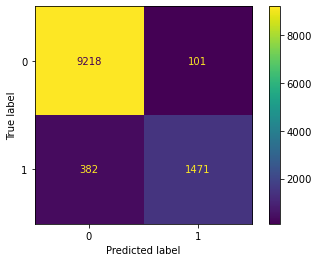

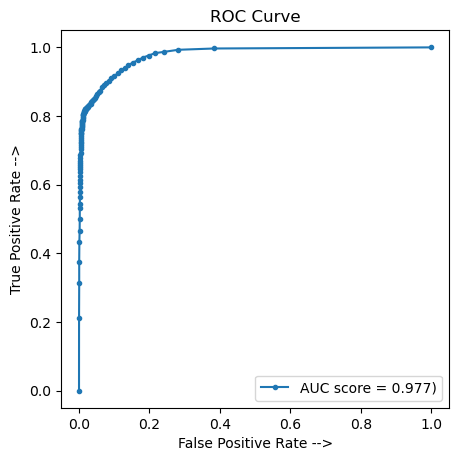

In [8]:
#Seperating the target feature 
X = wc_train_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
y = wc_train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Applying the predefined random_forest_classifier function I created
random_forest_classifier(X_train, X_test, y_train, y_test, wc_test_df)

## Random Forest Hyperparameter Optimization - West Coast Dataset

In [11]:
#Hyperparameters to manipulate

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

#Number of features to be considered at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Creating the param grid
rf_param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

Best Parameters:  {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 54, 'bootstrap': False}
Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      9319
           1       0.94      0.79      0.86      1853

    accuracy                           0.96     11172
   macro avg       0.95      0.89      0.92     11172
weighted avg       0.96      0.96      0.95     11172

Testing Data Confusion Matrix:


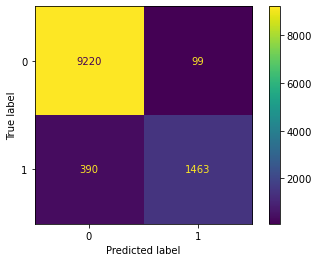

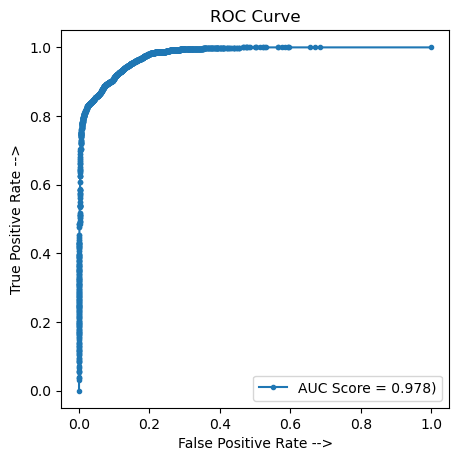

In [12]:
#Seperating the target feature 
X = wc_train_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
y = wc_train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Instantiateing the RandomForestClassifier
rf = RandomForestClassifier()

#Instantiating the RandomGrid
rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, scoring = 'f1', cv = 3, n_jobs = -1)

#Fitting the data to the RandomGrid
rf_grid.fit(X_train, y_train)

#Printing the best params
rf_best_params = rf_grid.best_params_
print('Best Parameters: ', rf_grid.best_params_)

#Testing the fitted model on the testing dataset
wc_test_X = wc_test_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
wc_test_y = wc_test_df['month_ahead_binary'].copy()

#Predicting on test data with fitted model
wc_test_y_pred = rf_grid.predict(wc_test_X)

# Compute predicted probabilities with test_X
wc_test_y_pred_prob = rf_grid.predict_proba(wc_test_X)[:,1]

#Printing the classification report
print('Testing Data Classification Report:\n',
    classification_report(wc_test_y, wc_test_y_pred))

#Printing the confusion matrix
print('Testing Data Confusion Matrix:\n ',
plot_confusion_matrix(rf_grid, wc_test_X, wc_test_y))

#Creating ROC Curve for model on testing dataset
rf_fpr, rf_tpr, threshold = roc_curve(wc_test_y, wc_test_y_pred_prob)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize = (5,5), dpi = 100)
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'AUC Score = %0.3f)' % auc_rf)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()


_**Because there was no incrase in model performance after hyperparameter tuning, I will not be attempting to do so on the full dataset.**_

## Random Forest - Full Dataset

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    247823
           1       0.79      0.63      0.70     13249

    accuracy                           0.97    261072
   macro avg       0.88      0.81      0.84    261072
weighted avg       0.97      0.97      0.97    261072

Testing Data Confusion Matrix:


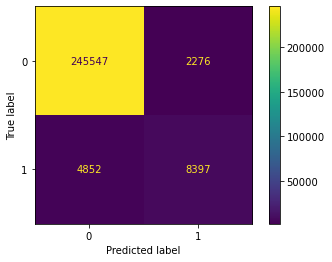

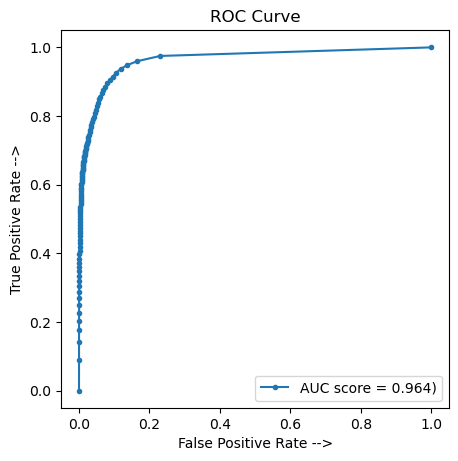

In [13]:
#Seperating the target feature 
X = train_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
y = train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Applying the predefined random_forest_classifier function I created
random_forest_classifier(X_train, X_test, y_train, y_test, test_df)

**West Coast Dataset:** \
Random Forest Model ROC AUC Score: 0.977\
Random Forest Model Class 1 Recall: 0.79\
Random Forest Model Class 1 F1-Score: 0.86

Random Forest Tuned Model ROC AUC Score: 0.978\
Random Forest Tuned Model Class 1 Recall: 0.79\
Random Forest Tuned Model Class 1 F1-Score: 0.86


**Full Dataset**\
Random Forest Model ROC AUC Score: 0.964\
Random Forest Model Class 1 Recall Score: 0.63\
Random Forest Model Class 1 F1-Score: 0.70








# Bagging Classifier

## Bagging Classifier - West Coast Dataset

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      9319
           1       0.92      0.77      0.84      1853

    accuracy                           0.95     11172
   macro avg       0.94      0.88      0.90     11172
weighted avg       0.95      0.95      0.95     11172

Testing Data Confusion Matrix:


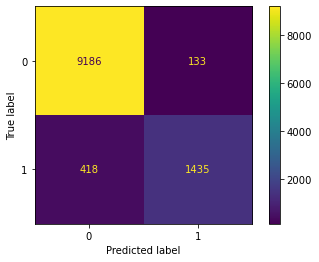

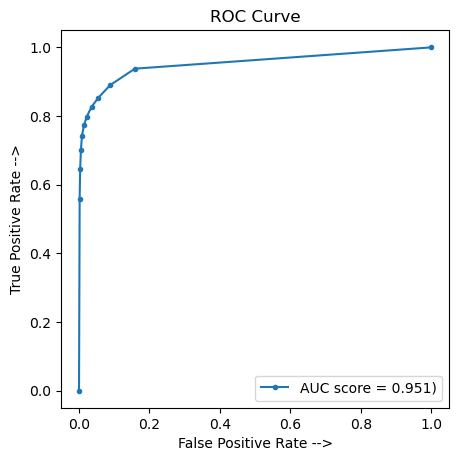

In [14]:
#Seperating the target feature 
X = wc_train_df.drop(['month_ahead_score', 'month_ahead_binary', 'fips'], axis = 1).copy()
y = wc_train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Applying the predefined random_forest_classifier function I created
bagging_classifier(X_train, X_test, y_train, y_test, wc_test_df)

## Bagging Classifier Hyperparameter Optimization - West Coast Dataset

In [15]:
#Hyperparameters to use in model
n_estimators_bag = [10, 50, 100, 500, 1000]

#Creating the parameter grid
param_grid_bag = {'n_estimators': n_estimators_bag}

Best Parameters:  {'n_estimators': 1000}
Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      9319
           1       0.92      0.79      0.85      1853

    accuracy                           0.95     11172
   macro avg       0.94      0.89      0.91     11172
weighted avg       0.95      0.95      0.95     11172

Testing Data Confusion Matrix:


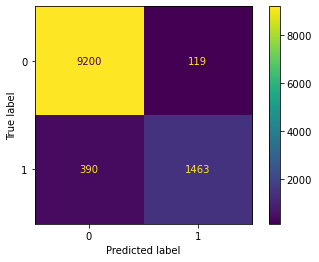

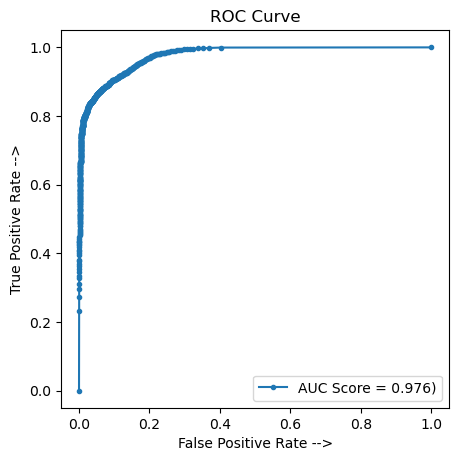

In [17]:
#Seperating the target feature 
X = wc_train_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
y = wc_train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#Instantiating the BaggingClassifier
bag_model = BaggingClassifier()

#Instantiating the GridSearch
bagging_GridSearch = GridSearchCV(bag_model, param_grid = param_grid_bag, scoring = 'f1', cv = 3, n_jobs = -1)

#Fitting the data to the GridSearch
bagging_GridSearch.fit(X_train, y_train)

#Printing the best parameters and the best score from the Bagging GridSearch model
print('Best Parameters: ', bagging_GridSearch.best_params_)

#Testing the fitted model on the testing dataset
wc_test_X = wc_test_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
wc_test_y = wc_test_df['month_ahead_binary'].copy()

wc_test_y_pred = bagging_GridSearch.predict(wc_test_X)

# Compute predicted probabilities with test_X
wc_test_y_pred_prob = bagging_GridSearch.predict_proba(wc_test_X)[:,1]

#Printing the classification report
print('Testing Data Classification Report:\n',
    classification_report(wc_test_y, wc_test_y_pred))

#Printing the confusion matrix
print('Testing Data Confusion Matrix:\n ',
plot_confusion_matrix(bagging_GridSearch, wc_test_X, wc_test_y))

#Creating ROC Curve for model on testing dataset
bag_fpr, bag_tpr, threshold = roc_curve(wc_test_y, wc_test_y_pred_prob)
auc_bag = auc(bag_fpr, bag_tpr)

plt.figure(figsize = (5,5), dpi = 100)
plt.plot(bag_fpr, bag_tpr, marker = '.', label = 'AUC Score = %0.3f)' % auc_bag)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()


_**Because there was no incrase in model performance after hyperparameter tuning, I will not be attempting to do so on the full dataset.**_

## Bagging Classifier - Full Dataset

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    247823
           1       0.77      0.61      0.68     13249

    accuracy                           0.97    261072
   macro avg       0.88      0.80      0.83    261072
weighted avg       0.97      0.97      0.97    261072

Testing Data Confusion Matrix:


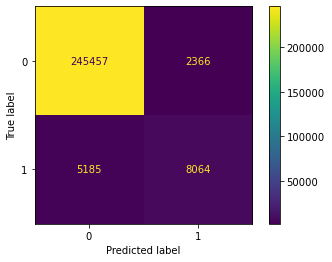

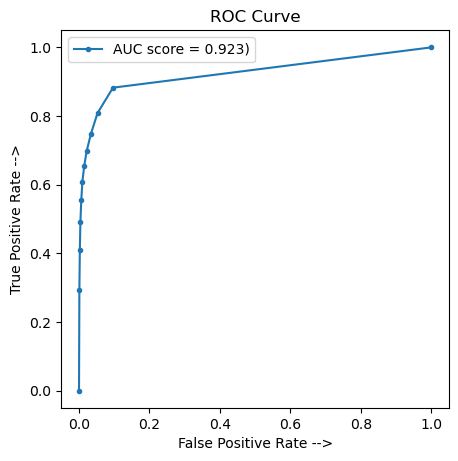

In [18]:
#Seperating the target feature 
X = train_df.drop(['month_ahead_score', 'month_ahead_binary', 'fips'], axis = 1).copy()
y = train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Applying the predefined random_forest_classifier function I created
bagging_classifier(X_train, X_test, y_train, y_test, test_df)

**West Coast Dataset:** \
Bagging Model ROC AUC Score: 0.951\
Bagging Model Class 1 Recall: 0.77\
Bagging Model Class 1 F1-Score: 0.84

Bagging Tuned Model ROC AUC Score: 0.976\
Bagging Tuned Model Class 1 Recall: 0.79\
Bagging Tuned Model Class 1 F1-Score: 0.85


**Full Dataset**\
Bagging Model ROC AUC Score: 0.923\
Bagging Model Class 1 Recall Score: 0.61\
Bagging Model Class 1 F1-Score: 0.68









# Gradient Boosting Classifier

## Gradient Boosting - West Coast Dataset

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      9319
           1       0.96      0.80      0.87      1853

    accuracy                           0.96     11172
   macro avg       0.96      0.90      0.93     11172
weighted avg       0.96      0.96      0.96     11172

Testing Data Confusion Matrix:


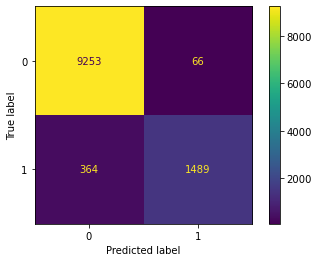

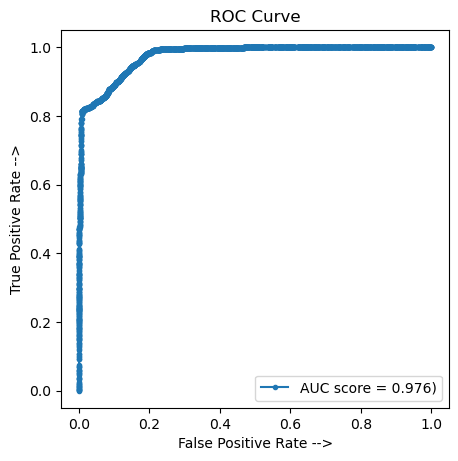

In [19]:
#Seperating the target feature 
X = wc_train_df.drop(['month_ahead_score', 'month_ahead_binary', 'fips'], axis = 1).copy()
y = wc_train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#Applying the predefined random_forest_classifier function I created
gradient_boosting_classifier(X_train, X_test, y_train, y_test, wc_test_df)

## Gradient Boosting Hyperparameter Optimization - West Coast Dataset 

In [20]:
#Hyperparameters to use in model
n_estimators_gb = [60,70,80,100,200,300,400,500,600,700]

#Creating the hyperparameter grid
param_grid_gb = {'n_estimators': n_estimators_gb}

Best params:  {'n_estimators': 700}
Testing Data Model Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      9319
           1       0.95      0.80      0.87      1853

    accuracy                           0.96     11172
   macro avg       0.95      0.90      0.92     11172
weighted avg       0.96      0.96      0.96     11172

Testing Data Model Confusion Matrix:


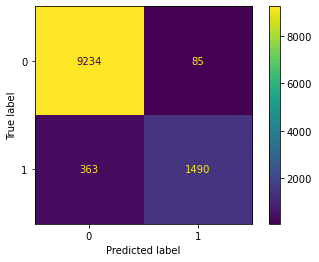

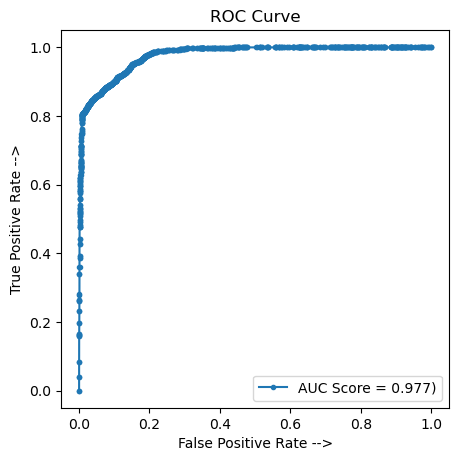

In [22]:
#Seperating the target feature 
X = wc_train_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
y = wc_train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#Instantiating the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

#Instantiating the GridSearch for the GradientBoostingClassifier model
gb_GridSearch = GridSearchCV(gb_model, param_grid = param_grid_gb, scoring = 'f1', cv = 3, n_jobs = -1)

#Fitting the training data to the GradientBoosting GridSearch model
gb_GridSearch.fit(X_train, y_train)

print('Best params: ', gb_GridSearch.best_params_)

#Testing the fitted model on the testing dataset
wc_test_X = wc_test_df.drop(['month_ahead_score', 'month_ahead_binary','fips'], axis = 1).copy()
wc_test_y = wc_test_df['month_ahead_binary'].copy()

wc_test_y_pred = gb_GridSearch.predict(wc_test_X)

# Compute predicted probabilities with test_X
wc_test_y_pred_prob = gb_GridSearch.predict_proba(wc_test_X)[:,1]

#Printing the classification report
print('Testing Data Model Classification Report:\n',
    classification_report(wc_test_y, wc_test_y_pred))

#Printing the confusion matrix
print('Testing Data Model Confusion Matrix:\n ',
plot_confusion_matrix(gb_GridSearch, wc_test_X, wc_test_y))

#Creating ROC Curve for model on testing dataset
gb_fpr, gb_tpr, threshold = roc_curve(wc_test_y, wc_test_y_pred_prob)
auc_gb = auc(gb_fpr, gb_tpr)

plt.figure(figsize = (5,5), dpi = 100)
plt.plot(gb_fpr, gb_tpr, marker = '.', label = 'AUC Score = %0.3f)' % auc_gb)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()



_**Because there was no incrase in model performance after hyperparameter tuning, I will not be attempting to do so on the full dataset.**_

## Gradient Boosting -  Full Dataset

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    247823
           1       0.79      0.65      0.71     13249

    accuracy                           0.97    261072
   macro avg       0.89      0.82      0.85    261072
weighted avg       0.97      0.97      0.97    261072

Testing Data Confusion Matrix:


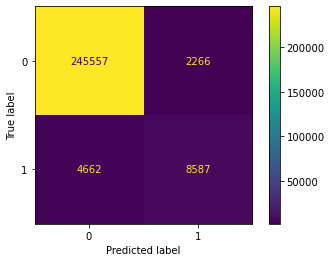

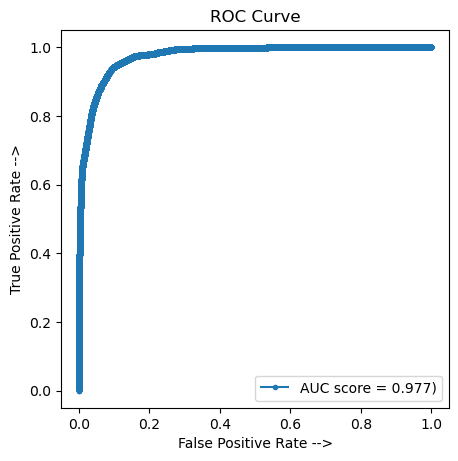

In [23]:
#Seperating the target feature 
X = train_df.drop(['month_ahead_score', 'month_ahead_binary', 'fips'], axis = 1).copy()
y = train_df['month_ahead_binary'].copy()

#Splitting the data with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

#Applying the predefined random_forest_classifier function I created
gradient_boosting_classifier(X_train, X_test, y_train, y_test, test_df)

**West Coast Dataset:** \
Gradient Boosting Model ROC AUC Score: 0.976\
Gradient Boosting Model Class 1 Recall: 0.80\
Gradient Boosting Model Class 1 F1-Score: 0.87

Gradient Boosting Tuned Model ROC AUC Score: 0.977\
Gradient Boosting Tuned Class 1 Recall: 0.80\
Gradient Boosting Tuned Class 1 F1-Score: 0.87


**Full Dataset**\
Gradient Boosting Model ROC AUC Score: 0.977\
Gradient Boosting Model Class 1 Recall Score: 0.65\
Gradient Boosting Model Class 1 F1-Score: 0.71










___

# Conclusions and Final Thoughts

Overall I am pleased with the performance of these models. Though not perfect, they are able to do fairly well at predicting whether a county will be experiencing high drought levels (Drought Score of 3, 4, or 5) one month into the future. 

The West Coast Dataset was able to achieve much higher accuracy for predicting future drought (Recall Score) than the Full Dataset. It might be best to create different models for all regions of the United States, depending on the area of concern. Since the west coast states seem to be at much higher risk of wildfire and drought than the rest of the country, the final model will be focused on the counties in those states. 

The best performing model was the **Gradient Boosting Classifier Model**, which had an ROC AUC Score of ~0.98 and a Recall Score of 80%. This indicates that **the model was able to correctly predict 80% of the actual high drought counties in the testing dataset.**